In [2]:
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph

## 8.2 "Talking by doing": signaling games

A signalling game in one in which player 2 is aware of what player 1 chose, but unaware of what the game is (nature's choice). This can be modelled best as an imperfect-information game: 

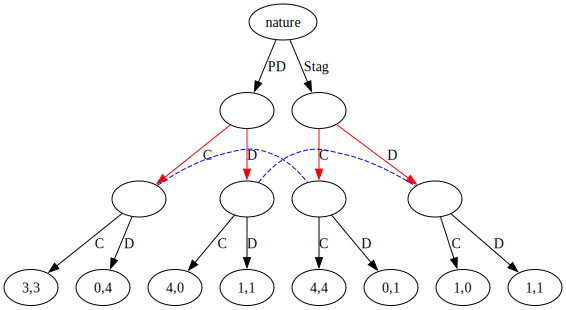

In [11]:
graph1 = Digraph()
graph1.node('root', 'nature')
graph1.node('p1_left', '')
graph1.node('p1_right', '')
graph1.edge('root', 'p1_left', 'PD', color="black")
graph1.edge('root', 'p1_right', 'Stag', color="black")
with graph1.subgraph() as same_rank:
    same_rank.attr(rank='same')
    same_rank.node('p1_left')
    same_rank.node('p1_right')
graph1.node('p2_left_after_left', '')
graph1.node('p2_right_after_left', '')
graph1.edge('p1_left', 'p2_left_after_left', 'C', color="red")
graph1.edge('p1_left', 'p2_right_after_left', "D", color="red")
graph1.node('p2_left_after_right', '')
graph1.node('p2_right_after_right', '')
graph1.edge('p1_right', 'p2_left_after_right', 'C', color="red")
graph1.edge('p1_right', 'p2_right_after_right', "D", color="red")
graph1.edge('p2_left_after_left', 'p2_left_after_right', '', color="blue", style="dashed", dir="none")
graph1.edge('p2_right_after_left', 'p2_right_after_right', '', color="blue", style="dashed", dir="none")
with graph1.subgraph() as same_rank:
    same_rank.attr(rank='same')
    same_rank.node('p2_left_after_left')
    same_rank.node('p2_right_after_left')
    same_rank.node('p2_left_after_right')
    same_rank.node('p2_right_after_right')
graph1.node('outcome_LL_A', '3,3')
graph1.node('outcome_LL_B', '0,4')
graph1.edge('p2_left_after_left', 'outcome_LL_A', 'C', color="black")
graph1.edge('p2_left_after_left', 'outcome_LL_B', "D", color="black")
graph1.node('outcome_LR_A', '4,0')
graph1.node('outcome_LR_B', '1,1')
graph1.edge('p2_right_after_left', 'outcome_LR_A', 'C', color="black")
graph1.edge('p2_right_after_left', 'outcome_LR_B', "D", color="black")
graph1.node('outcome_RL_A', '4,4')
graph1.node('outcome_RL_B', '0,1')
graph1.edge('p2_left_after_right', 'outcome_RL_A', 'C', color="black")
graph1.edge('p2_left_after_right', 'outcome_RL_B', "D", color="black")
graph1.node('outcome_RR_A', '1,0')
graph1.node('outcome_RR_B', '1,1')
graph1.edge('p2_right_after_right', 'outcome_RR_A', 'C', color="black")
graph1.edge('p2_right_after_right', 'outcome_RR_B', "D", color="black")
display(graph1)

In this case if player 2 observes that player 1 has defected their best strategy is also to defect. On the other hand, what if player 1 cooperates? Player 2 doesn't know if it should cooperate or defect in this case. 

One option for player 2 is to look at the probability that player 1 makes a particular decision under each game, and then marginalizes to get the probabilities of the games. While tempting, unfortunately it is also true that player 1's action will depend on what they *expect* player 2 to do.

Consider a pair of zero sum games like these:

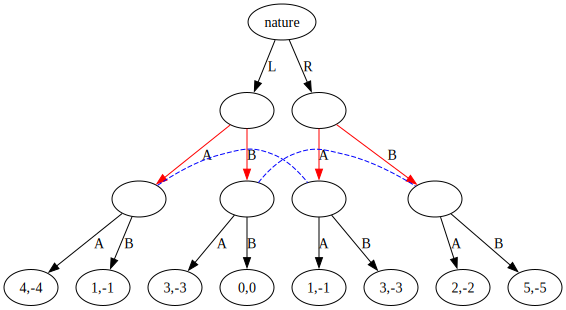

In [15]:
graph2 = Digraph()
graph2.node('root', 'nature')
graph2.node('p1_left', '')
graph2.node('p1_right', '')
graph2.edge('root', 'p1_left', 'L', color="black")
graph2.edge('root', 'p1_right', 'R', color="black")
with graph2.subgraph() as same_rank:
    same_rank.attr(rank='same')
    same_rank.node('p1_left')
    same_rank.node('p1_right')
graph2.node('p2_left_after_left', '')
graph2.node('p2_right_after_left', '')
graph2.edge('p1_left', 'p2_left_after_left', 'A', color="red")
graph2.edge('p1_left', 'p2_right_after_left', 'B', color="red")
graph2.node('p2_left_after_right', '')
graph2.node('p2_right_after_right', '')
graph2.edge('p1_right', 'p2_left_after_right', 'A', color="red")
graph2.edge('p1_right', 'p2_right_after_right', 'B', color="red")
graph2.edge('p2_left_after_left', 'p2_left_after_right', '', color="blue", style="dashed", dir="none")
graph2.edge('p2_right_after_left', 'p2_right_after_right', '', color="blue", style="dashed", dir="none")
with graph2.subgraph() as same_rank:
    same_rank.attr(rank='same')
    same_rank.node('p2_left_after_left')
    same_rank.node('p2_right_after_left')
    same_rank.node('p2_left_after_right')
    same_rank.node('p2_right_after_right')
graph2.node('outcome_LL_A', '4,-4')
graph2.node('outcome_LL_B', '1,-1')
graph2.edge('p2_left_after_left', 'outcome_LL_A', 'A', color="black")
graph2.edge('p2_left_after_left', 'outcome_LL_B', 'B', color="black")
graph2.node('outcome_LR_A', '3,-3')
graph2.node('outcome_LR_B', '0,0')
graph2.edge('p2_right_after_left', 'outcome_LR_A', 'A', color="black")
graph2.edge('p2_right_after_left', 'outcome_LR_B', 'B', color="black")
graph2.node('outcome_RL_A', '1,-1')
graph2.node('outcome_RL_B', '3,-3')
graph2.edge('p2_left_after_right', 'outcome_RL_A', 'A', color="black")
graph2.edge('p2_left_after_right', 'outcome_RL_B', 'B', color="black")
graph2.node('outcome_RR_A', '2,-2')
graph2.node('outcome_RR_B', '5,-5')
graph2.edge('p2_right_after_right', 'outcome_RR_A', 'A', color="black")
graph2.edge('p2_right_after_right', 'outcome_RR_B', 'B', color="black")
display(graph2)

In the game on the left player 1 would go A and get the reward after player 2 goes B, which is 1. On the right player 1 would go B and get the reward of 2. This averages out to a score of 1.5. While this seems rational it ignores that player 2 lacks information! If player 1 always chooses B, then no matter what player 2 does player 1 expects to get a return of 2.5 (if player 2 goes A, it gets 3 or 2, and if B it gets 0 or 5).

All this is to say it's not enough for player 2 to just look at what the best strategy for player 1 is for each subgame. 

Signalling games are an example of games of asymetric information. The book points to the Spence signalling game as an example.